In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Pricing a European option using Black-Scholes formula and Monte Carlo simulations
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier


# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
  # --------- Insert your code here --------- #

  t = 0

  d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * (T - t) ) / (sigma * np.sqrt(T - t))
  d2 = d1 - sigma * np.sqrt(T - t)

  c = norm.cdf(d1) * S0 - norm.cdf(d2) * K * np.exp(-r * (T - t))
  p = norm.cdf(-d2) * K * np.exp(-r * (T - t)) - norm.cdf(-d1) * S0

  return c, p


def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #

  paths = np.zeros((numSteps + 1, numPaths))

  # dT is the time increment (in years)
  dT = T / numSteps

  drift = (mu - 0.5 * sigma**2) * dT
  diffusion = sigma * np.sqrt(dT)

  # Vector of paths will store realizations of the asset price
  # First asset price is the initial price
  paths[0] = [S0] * numPaths

  # Generate paths
  for iPath in range(numPaths):
      for iStep in range(numSteps):
          paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp(drift + diffusion * np.random.normal(0,1))

  # call and put payoff
  call_payoff = np.maximum(paths[numSteps:] - K, 0)
  put_payoff = np.maximum(K - paths[numSteps:], 0)

  # discount back
  c = np.mean(call_payoff) * np.exp(-r * T)
  p = np.mean(put_payoff) * np.exp(-r * T)

  return c, p, paths


def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #

  paths = np.zeros((numSteps + 1, numPaths))

  # dT is the time increment (in years)
  dT = T / numSteps

  drift = (mu - 0.5 * sigma**2) * dT
  diffusion = sigma * np.sqrt(dT)

  # Vector of paths will store realizations of the asset price
  # First asset price is the initial price
  paths[0] = [S0] * numPaths

  # Generate paths
  for iPath in range(numPaths):
      for iStep in range(numSteps):
          paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp(drift + diffusion * np.random.normal(0,1))

  # call and put payoff
  call_payoff = []
  put_payoff = []

  for i in range(numPaths):
      path = paths[:, i]
      if np.sum(path >= Sb)>0:
          call_payoff.append(np.maximum(paths[numSteps,i] - K, 0))
          put_payoff.append(np.maximum(K - paths[numSteps,i], 0))
      else:
          call_payoff.append(0)
          put_payoff.append(0)

  # discount back
  c = np.mean(call_payoff) * np.exp(-r * T)
  p = np.mean(put_payoff) * np.exp(-r * T)

  return c, p

# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 10;
numPaths = 1000000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, paths_1_step = MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, paths_multi_step = MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step))
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step))
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step))
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step))
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step))
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step))
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step))
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

# Plot results
# --------- Insert your code here --------- #

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.025085151886262
One-step MC price of an European put option is 7.908695506529855
Multi-step MC price of an European call option is 8.023922341340521
Multi-step MC price of an European put option is 7.910184141428295
One-step MC price of an Barrier call option is 7.802040536889831
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.936952897631397
Multi-step MC price of an Barrier put option is 1.1942316099194712


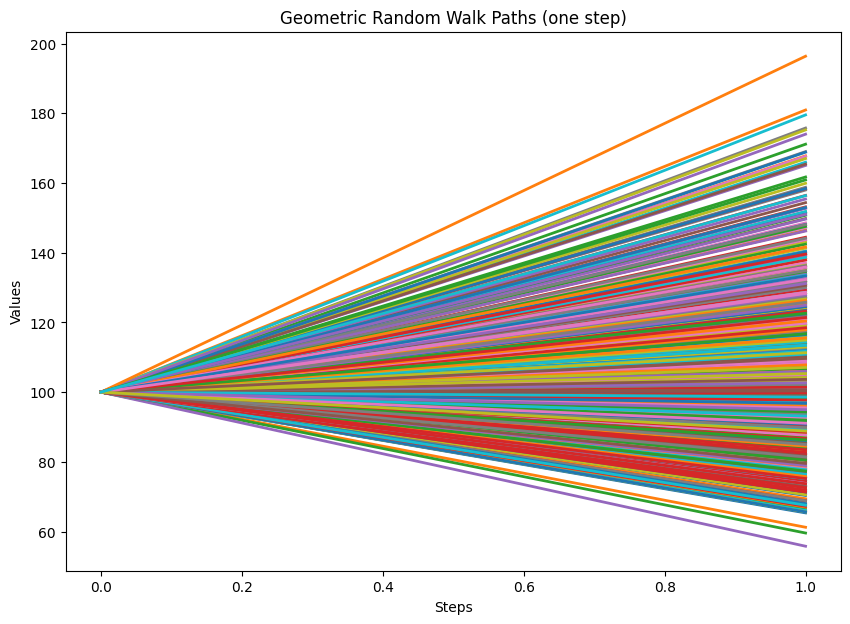

In [2]:
plt.figure(figsize = (10,7))
[plt.plot(paths_1_step[:,i], linewidth=2) for i in range(1000)]
plt.title('Geometric Random Walk Paths (one step)')
plt.xlabel('Steps')
plt.ylabel('Values')
plt.show()

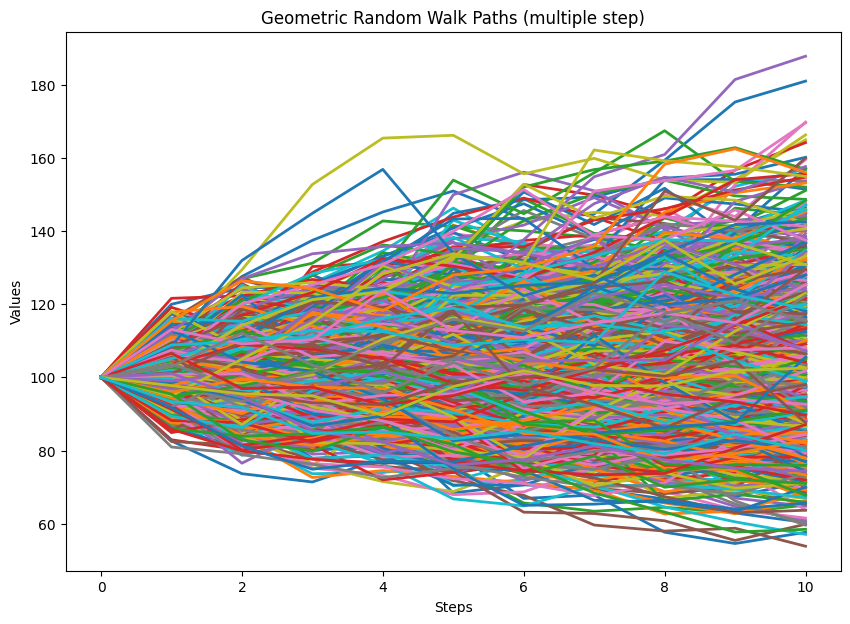

In [3]:
plt.figure(figsize = (10, 7))
[plt.plot(paths_multi_step[:,i], linewidth=2) for i in range(1000)]
plt.title('Geometric Random Walk Paths (multiple step)')
plt.xlabel('Steps')
plt.ylabel('Values')
plt.show()

In [4]:
# volatility increased by 10%

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_stepin, putMC_Barrier_Knockin_Price_1_stepin = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_stepin, putMC_Barrier_Knockin_Price_multi_stepin = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)

# volatility decreased by 10%

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_stepde, putMC_Barrier_Knockin_Price_1_stepde = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_stepde, putMC_Barrier_Knockin_Price_multi_stepde = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths)


print('One-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_stepin))
print('One-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_stepin))
print('Multi-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_stepin))
print('Multi-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_stepin))
print('One-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_stepde))
print('One-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_stepde))
print('Multi-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_stepde))
print('Multi-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_stepde))



One-step MC price of an Barrier call option with volatility increased by 10% is 8.629321145338059
One-step MC price of an Barrier put option with volatility increased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility increased by 10% is 8.766073436055725
Multi-step MC price of an Barrier put option with volatility increased by 10% is 1.4957437612777778
One-step MC price of an Barrier call option with volatility decreased by 10% is 7.004450192196351
One-step MC price of an Barrier put option with volatility decreased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility decreased by 10% is 7.135727744048845
Multi-step MC price of an Barrier put option with volatility decreased by 10% is 0.9180588177098236


# Design your own procedure for choosing a number of time steps and a number of scenarios in Monte Carlo pricing for European option to get the same price (up to the cent) as given by the Black-Scholes formula.

In [5]:
# try diff number of paths
paths = [10, 100, 500, 1000, 5000, 10000, 30000, 50000, 70000, 100000, 300000, 500000, 700000, 1000000]

call_BS_European_Price, put_BS_European_Price = BS_european_price(S0, K, T, r, sigma)

residual_call_opt, residual_put_opt = 0.01, 0.01
callMC_opt = None
putMC_opt = None
num_path_call_opt = None
num_path_put_opt = None

for num_path in paths:
    # one-step MC simulation is mathematically consistent with the Black-Scholes assumptions
    # because the European option only depends on the terminal stock price under log-normal distribution
    callMC_European_Price_1_step, putMC_European_Price_1_step, _ = MC_european_price(S0, K, T, r, mu, sigma, 1, num_path)

    # find residual
    call_residual = abs(callMC_European_Price_1_step - call_BS_European_Price)
    # if residual smaller than 0.01
    if call_residual < residual_call_opt and callMC_opt is None:
        residual_call_opt = call_residual
        num_path_call_opt = num_path
        callMC_opt = callMC_European_Price_1_step

    # find residual
    put_residual = abs(putMC_European_Price_1_step - put_BS_European_Price)
    # if residual smaller than 0.01
    if put_residual < residual_put_opt and putMC_opt is None:
        residual_put_opt = put_residual
        num_path_put_opt = num_path
        putMC_opt = putMC_European_Price_1_step

# Handle the case where no match was found
callMC_opt = callMC_opt if callMC_opt is not None else "Not found"
putMC_opt = putMC_opt if putMC_opt is not None else "Not found"

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('Closest MC price of call within 0.01 is', callMC_opt, 'using number of paths', num_path_call_opt)
print('Closest MC price of put within 0.01 is', putMC_opt, 'using number of paths', num_path_put_opt)


Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
Closest MC price of call within 0.01 is 8.015412104921571 using number of paths 300000
Closest MC price of put within 0.01 is 7.904343770940655 using number of paths 70000
